### I. Set the Directory and load the dataset into R or Python, verify that the data is loaded correctly

In [594]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [595]:
data = pd.read_excel('Employees.xlsx')

In [596]:
data.shape

(14999, 10)

In [597]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


The data contains 14999 employees and 10 features. The “left” column is the target variable, 1 for employees who left the company and 0 for those who didn't.

Observing "department" column, I found some redudant department names : support, technical, IT. I assume they refer to the same department, so let's combine them all as 'IT'.

In [598]:
data['department']=np.where(data['department'] =='support', 'IT', data['department'])
data['department']=np.where(data['department'] =='technical', 'IT', data['department'])

In [599]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'IT', 'management', 'product_mng',
       'marketing', 'RandD'], dtype=object)

### II. Find the correlation values of the attributes of the data

Before finding correlation value, we need to quantify the qualitative features: "salary" and "department". Convert "salary" column into ordinal integer value and "department" column into dummy variables. 

In [600]:
# Map salary into integers
salary_map = {"low": 0, "medium": 1, "high": 2}
data['salary'] = data['salary'].map(salary_map)

In [601]:
# Create dummy variables for department feature
data = pd.get_dummies(data, columns=["department"])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1


In [602]:
data.shape

(14999, 17)

In [603]:
data.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary',
 'department_IT',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales']

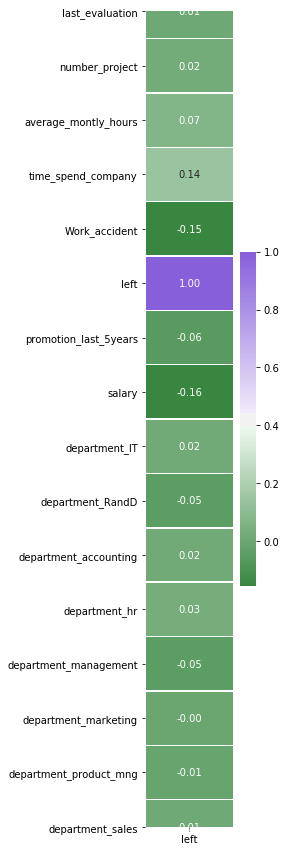

In [604]:
# create a correlation heatmap of all features in relation to left
fig, ax = plt.subplots(figsize = (2, 15))
cmap = sns.diverging_palette(130, 275, as_cmap=True)
sns.heatmap(data[data.columns[1:]].corr()[['left']], annot=True, linewidths=.4, fmt=".2f", cmap=cmap, ax=ax);
#sns.set(font_scale=4)

#plt.savefig("heatmap_fe_4.png")

Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

### III. Visualize the characteristics of the whole data and only the people who left, use plots and histograms

In [605]:
# check how many employess left
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Here, you can see out of 15,000 approx 3,571 were left, and 11,428 stayed.

In [606]:
# find characteristics of employees who are left
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales
left,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.650945,0.406983,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.414730,0.427051,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954


Here you can see, Employees who left the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

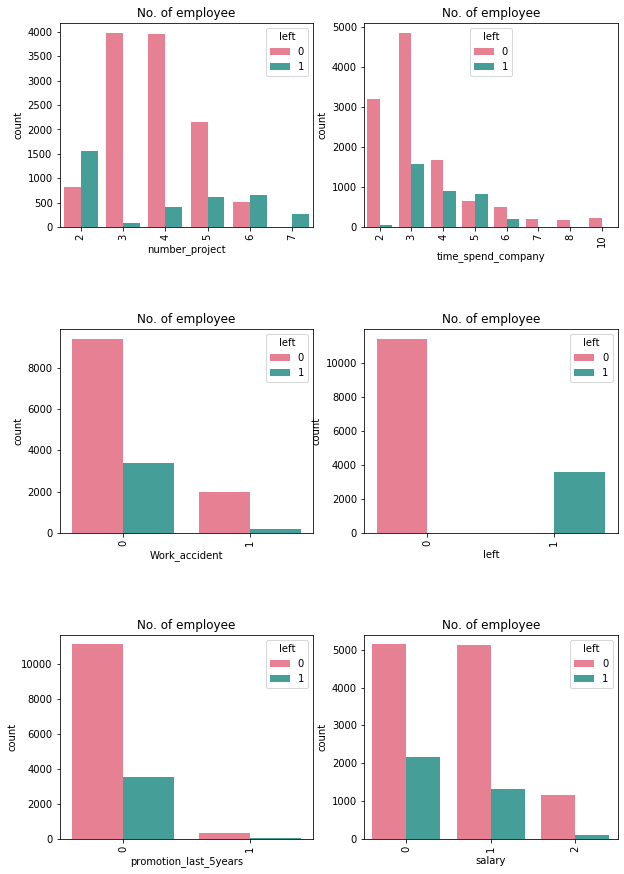

In [607]:
# Visualize characteristics of employees who are left in all features
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years', 'salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = data, hue='left', palette="husl")
    plt.xticks(rotation=90)
    plt.title("No. of employee")

### IV. Evaluate the values of each attributes for both left and non-left employees

Based on histograms above, we can see :
1. Employees who have the number of projects more than 5 were left the company.
2. The employee with five-year experience is leaving more because of no promotions in last 5 years.
3. Employees who got promotion in last 5 years they didn't leave.
4. Employee with low salary is leaving more.

### V. Analyze the department wise turnouts and find out the percentage of employees leaving from each department

In [608]:
# get only data department
data.iloc[:, 9:18]

,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
14994,1,0,0,0,0,0,0,0
14995,1,0,0,0,0,0,0,0
14996,1,0,0,0,0,0,0,0
14997,1,0,0,0,0,0,0,0


In [609]:
# concat data departement with left features
data_department = pd.concat([data.iloc[:, 9:18], data['left']], axis=1)

In [610]:
data_department

,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,left
0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
14994,1,0,0,0,0,0,0,0,1
14995,1,0,0,0,0,0,0,0,1
14996,1,0,0,0,0,0,0,0,1
14997,1,0,0,0,0,0,0,0,1


In [611]:
# total employees per department
total_employees = data_department.iloc[:,0:8].sum().tolist()
total_employees

[6176, 787, 767, 739, 630, 858, 902, 4140]

In [612]:
# sum of employees leave and stay
groupped_data = data_department.groupby('left').sum()

In [613]:
groupped_data

,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales
left,,,,,,,,
0,4651.0,666.0,563.0,524.0,539.0,655.0,704.0,3126.0
1,1525.0,121.0,204.0,215.0,91.0,203.0,198.0,1014.0


In [614]:
# percentage of employees leaving per deaprtmenet respectively
list_percentage = list()
for i, j in enumerate (groupped_data.columns):
    if groupped_data.index.get_level_values(0).values.tolist()[1]:
        left_employees = groupped_data.iat[1,i]
        percentage = 100*left_employees/total_employees[i]
        list_percentage.append([j,percentage])

In [615]:
list_percentage

[['department_IT', 24.692357512953368],
 ['department_RandD', 15.374841168996188],
 ['department_accounting', 26.597131681877446],
 ['department_hr', 29.09336941813261],
 ['department_management', 14.444444444444445],
 ['department_marketing', 23.65967365967366],
 ['department_product_mng', 21.951219512195124],
 ['department_sales', 24.492753623188406]]

In [616]:
# Create DataFrame Percentage
df_percentage = pd.DataFrame(list_percentage, columns = ['Department', 'Percentage']) 
df_percentage

,Department,Percentage
0,department_IT,24.692358
1,department_RandD,15.374841
2,department_accounting,26.597132
3,department_hr,29.093369
4,department_management,14.444444
5,department_marketing,23.659674
6,department_product_mng,21.951220
7,department_sales,24.492754


### VI-VII. Build a classification model to forecast what are the attributes of people who leave the company using Decision Tree, Random Forest, Naïve Bayes and SVM techniques and find out the most accurate one

In [617]:
X = data.loc[:, data.columns != "left"]
y = data['left']

In [618]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Evaluate each method using 10 fold cross validation (CV) and f1 score then choose the one with the highest CV f1-score.

### Decision Tree

In [619]:
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
treeCV = tree.DecisionTreeClassifier()
treeCV.fit(X_train, y_train)
scoring = 'f1'
results = model_selection.cross_val_score(treeCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Decision tree average f1 score: %.3f" % (results.mean()))

Decision tree average f1 score: 0.951


In [620]:
from sklearn.metrics import classification_report
print(classification_report(y_test, treeCV.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.93      0.97      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.96      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500



### Random Forest

In [621]:
from sklearn.ensemble import RandomForestClassifier
rfCV = RandomForestClassifier()
rfCV.fit(X_train, y_train)
scoring = 'f1'
results = model_selection.cross_val_score(rfCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Random forest average f1 score: %.3f" % (results.mean()))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random forest average f1 score: 0.975


In [622]:
print(classification_report(y_test, rfCV.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.96      0.97      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



### Naive Bayes

In [623]:
from sklearn.naive_bayes import GaussianNB
naiveCV = GaussianNB()
naiveCV.fit(X_train, y_train)
scoring = 'f1'
results = model_selection.cross_val_score(naiveCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Naive Bayes average f1 score: %.3f" % (results.mean()))

Naive Bayes average f1 score: 0.580


In [624]:
print(classification_report(y_test, naiveCV.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      3462
           1       0.46      0.78      0.58      1038

    accuracy                           0.74      4500
   macro avg       0.69      0.76      0.70      4500
weighted avg       0.81      0.74      0.76      4500



### Support Vector Machine

In [625]:
from sklearn.svm import SVC
svmCV = SVC()
svmCV.fit(X_train, y_train)
scoring = 'f1'
results = model_selection.cross_val_score(svmCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Support vector machine average f1 score: %.3f" % (results.mean()))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Support vector machine average f1 score: 0.895


In [626]:
print(classification_report(y_test, svmCV.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3462
           1       0.89      0.91      0.90      1038

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500



Random Forest give the most highest f1-score.

In [627]:
# important features
features = list(data.columns.values.tolist())
features.remove('left')
feature_labels=np.array(features)
importance = rfCV.feature_importances_
feature_indexes_by_importance = np.flip(importance.argsort())
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

satisfaction_level-26.99%
number_project-23.37%
time_spend_company-17.28%
average_montly_hours-15.57%
last_evaluation-13.34%
salary-1.01%
Work_accident-0.77%
department_IT-0.37%
department_sales-0.28%
department_accounting-0.22%
department_management-0.19%
promotion_last_5years-0.17%
department_RandD-0.13%
department_hr-0.12%
department_product_mng-0.10%
department_marketing-0.09%


Based on Random Forest model, five most important features are:

1. satisfaction_level
2. number_project
3. time_spend_company
4. average_montly_hours
5. last_evaluation